## <p style="font-family: Times New Roman; font-size:1.4em;color:black;"> Sistemas de Recomendação </p>
<p style="font-family: Times New Roman; font-size:1.2em;color:blue;"> Objetivo: Aprender e aplicar o Algoritmo de Sistemas de Recomendação, que consistem em sistemas recomendar elementos de características semelhantes aos elementos ja escolhidos pela preferência de um usuário. Por exemplo, para um Dataset de filmes, a partir da escolha do usuário, o algoritmo reune os elementos (filmes) presentes no Dataset que apresentam características semelhantes ao escolhido pelo usuário e os recomenda para o mesmo. </p>

In [1]:
# OBS: Comando para Instalar a função surprise!!!!
# conda install -c conda-surge scikit-surprise
# pip install scikit-surprise

# Comando para importar a Biblioteca Suprise:
import surprise
# Comandos para importar as outras funções:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Comando para carregar o dataset:
dataset = pd.read_csv('C:/Users/amdua/OneDrive/Documentos/ArquivosPython/ratings.txt', sep = " ", 
names = ['id_usuario', 'id_filme', 'rating'])

In [3]:
dataset.head(20)

id_usuario  id_filme  rating
0            1         1     2.0
1            1         2     4.0
2            1         3     3.5
3            1         4     3.0
4            1         5     4.0
5            1         6     3.5
6            1         7     3.5
7            1         8     3.0
8            1         9     2.5
9            1        10     4.0
10           1        11     4.0
11           1        12     4.0
12           2        13     2.0
13           3        14     0.5
14           3        15     1.0
15           3        16     4.0
16           3        17     3.0
17           3        18     4.0
18           3        19     4.0
19           3        20     2.5

In [4]:
# Comandos para mostrar a quantidade total de cada elemento em forma de lista:
filmes = len(dataset['id_filme'].unique())
usuarios = len(dataset['id_usuario'].unique())
amostras = dataset.shape[0]
print('Total de filmes:', filmes)
print('Total de usuários:', usuarios)
print('Total de amostras:', amostras)

Total de filmes: 2071
Total de usuários: 1508
Total de amostras: 35497


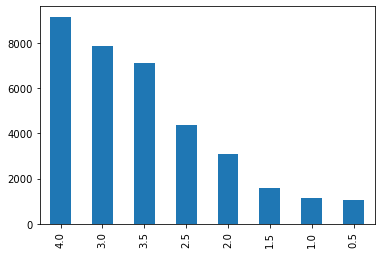

In [5]:
# Comando para mostrar a quantidde de vezes que cada taxa/nota que foi dada para os filmes:
dataset['rating'].value_counts().plot(kind='bar')
plt.show()

In [6]:
# Comando para mostrar a quantidde mínima e máxima dos ratings:
menor_rating = dataset['rating'].min()
maior_rating = dataset['rating'].max()
print ('Variação de rating: {0} a {1}'.format(menor_rating, maior_rating))

Variação de rating: 0.5 a 4.0


In [7]:
# Comando para redefinir o range (a faixa) de ratings, pois o range padrão é de 1.0 a 5.0:
reader = surprise.Reader(rating_scale = (0.5, 4.0)) # pode carregar um dataset built-in também!!
dataset_surprise = surprise.Dataset.load_from_df(dataset, reader)

In [8]:
# Comando para escolher o algoritmo e treinar o modelo:
dataset_preenchido = dataset_surprise.build_full_trainset() # comando build_full_trainset serve para criar o conjunto de treino!
algoritmo = surprise.SVDpp(n_factors=20) # SVD++
algoritmo.fit(dataset_preenchido)

In [9]:
# Comando para fazer a predição dos dados faltantes:
dataset_missing = dataset_preenchido.build_anti_testset()
previsoes = algoritmo.test(dataset_missing)

In [10]:
previsoes[0]

Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.5420112758118303, details={'was_impossible': False})

In [11]:
previsoes

[Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.5420112758118303, details={'was_impossible': False}),
 Prediction(uid=1, iid=14, r_ui=3.0028030537791928, est=2.9250947627378125, details={'was_impossible': False}),
 Prediction(uid=1, iid=15, r_ui=3.0028030537791928, est=3.068999741222822, details={'was_impossible': False}),
 Prediction(uid=1, iid=16, r_ui=3.0028030537791928, est=3.49922128836164, details={'was_impossible': False}),
 Prediction(uid=1, iid=17, r_ui=3.0028030537791928, est=3.1626640748550057, details={'was_impossible': False}),
 Prediction(uid=1, iid=18, r_ui=3.0028030537791928, est=3.4488480956385184, details={'was_impossible': False}),
 Prediction(uid=1, iid=19, r_ui=3.0028030537791928, est=3.316944814113907, details={'was_impossible': False}),
 Prediction(uid=1, iid=20, r_ui=3.0028030537791928, est=3.1449310519165077, details={'was_impossible': False}),
 Prediction(uid=1, iid=21, r_ui=3.0028030537791928, est=3.055588952445476, details={'was_impossible': False}

In [12]:
len(previsoes)

3087574

In [13]:
# Comandos que criam uma função para retornar as Top-N recomendações para cada usuário!!!!
# OBS: Esta função retornará um dicionário onde as chaves são os usuários e os valores são listas de tuplas 
#..(filme, rating_previsto).
from collections import defaultdict

def obtem_top_n(previsoes, n=5): # Comando onde n = a quantidade de recomendações desejadas!!
    top_n = defaultdict(list) # Comando que cria um dicionário onde os valores são listas vazias!!
    for usuario, filme, _, previsao, _ in previsoes: # O comando _ é quando usar quando não estamos interessados neste valor!!
        top_n[usuario].append((filme, previsao)) # Comando que adiciona o par chave:valor ao dicionário criado!!
    for usuario, previsoes_usuario in top_n.items(): # O comando .items() é para iterar o conjunto (chave:valor) do dicionário!!
        previsoes_usuario.sort(key=lambda x:x[1], reverse=True) # Comando que ordena as previsões de rating do maior pro menor!!
        top_n[usuario] = previsoes_usuario[:n] # Comando que salva somente os N primeiros valores
    return top_n

In [14]:
dic = defaultdict(list)

In [15]:
dic[0]

[]

In [16]:
top_5 = obtem_top_n(previsoes, n=5)

In [17]:
top_5

defaultdict(list,
            {1: [(286, 4.0),
              (335, 4.0),
              (805, 3.9647885827609564),
              (675, 3.8956317543441905),
              (728, 3.8467160721433853)],
             2: [(335, 3.5356804425968007),
              (286, 3.527233873227187),
              (318, 3.50392295329346),
              (805, 3.486794269935567),
              (705, 3.4497667900247637)],
             3: [(215, 4.0), (217, 4.0), (286, 4.0), (304, 4.0), (415, 4.0)],
             4: [(286, 3.3772845435467516),
              (675, 3.3531935494496388),
              (805, 3.3123478920679394),
              (705, 3.268597413097548),
              (335, 3.232209933805174)],
             5: [(286, 3.795355177981272),
              (335, 3.6967961406822205),
              (218, 3.69565078648947),
              (1118, 3.6698387963234467),
              (805, 3.6587973003376666)],
             6: [(286, 4.0),
              (335, 4.0),
              (689, 3.99223090660733),
            

In [18]:
for usuario, previsoes_usuario in top_5.items():
    print(usuario, [filme for (filme, _) in previsoes_usuario])

1 [286, 335, 805, 675, 728]
2 [335, 286, 318, 805, 705]
3 [215, 217, 286, 304, 415]
4 [286, 675, 805, 705, 335]
5 [286, 335, 218, 1118, 805]
6 [286, 335, 689, 805, 705]
7 [286, 805, 335, 728, 363]
8 [286, 318, 335, 805, 425]
9 [335, 286, 805, 689, 400]
10 [286, 335, 805, 318, 675]
11 [286, 805, 335, 398, 484]
12 [286, 335, 805, 675, 299]
13 [335, 286, 299, 425, 307]
14 [286, 335, 805, 11, 689]
15 [286, 318, 335, 307, 689]
16 [286, 363, 705, 805, 307]
17 [286, 805, 363, 335, 705]
18 [286, 805, 335, 218, 425]
19 [286, 335, 658, 805, 728]
20 [286, 805, 307, 563, 675]
21 [43, 68, 126, 181, 187]
22 [52, 126, 189, 218, 242]
23 [286, 805, 675, 335, 689]
24 [286, 805, 335, 318, 299]
25 [335, 286, 689, 805, 728]
26 [286, 675, 705, 563, 689]
27 [286, 218, 425, 335, 675]
28 [286, 658, 805, 335, 572]
29 [805, 425, 728, 250, 465]
30 [335, 286, 689, 805, 293]
31 [286, 805, 218, 335, 675]
32 [335, 286, 805, 363, 657]
33 [286, 335, 805, 728, 675]
34 [286, 805, 335, 689, 705]
35 [286, 335, 805, 307, 21

1183 [805, 705, 335, 689, 363]
1184 [286, 335, 805, 318, 307]
1185 [286, 805, 335, 728, 675]
1186 [286, 335, 218, 705, 805]
1187 [805, 307, 446, 658, 705]
1188 [286, 335, 805, 658, 399]
1189 [286, 805, 335, 675, 689]
1190 [286, 805, 335, 658, 689]
1191 [286, 805, 335, 675, 218]
1192 [286, 335, 675, 805, 689]
1193 [335, 286, 675, 400, 563]
1194 [335, 286, 318, 728, 446]
1195 [68, 218, 286, 299, 363]
1196 [286, 805, 335, 675, 318]
1197 [286, 335, 805, 689, 307]
1198 [286, 318, 689, 307, 658]
1199 [68, 96, 97, 189, 218]
1200 [286, 299, 318, 335, 675]
1201 [335, 286, 805, 702, 400]
1202 [286, 335, 805, 689, 293]
1203 [11, 13, 24, 43, 52]
1204 [286, 805, 335, 307, 728]
1205 [286, 805, 675, 689, 705]
1206 [286, 805, 335, 218, 307]
1207 [286, 805, 218, 307, 675]
1208 [286, 805, 335, 675, 705]
1209 [286, 335, 299, 805, 689]
1210 [335, 286, 805, 425, 400]
1211 [286, 705, 675, 563, 805]
1212 [213, 250, 286, 1116, 705]
1213 [286, 805, 675, 689, 318]
1214 [335, 805, 307, 728, 658]
1215 [286, 805, 

In [19]:
# Comando para fazer uma previsão somenta para um usuário e filme específico:
previsao_usuario = algoritmo.predict(uid='30', iid='87')
rating = previsao_usuario.est
print(rating)

3.0028030537791928
